# Proyek Analisis Data: Nama dataset
- Nama:Yudhi Ahmadi
- Email:ahmadiyudhi3@gmail.com
- Id Dicoding:yudhex23

## Menentukan Pertanyaan Bisnis

1. Bagaimana Peforma Penjualan dan revenue dalam perusahaan tersebut ?
2. Pembayaran apa saja yang sering digunakan oleh pelanggan ?
3. Bagaimana Tingkat Kepuasan Pelanggan? Produk apa yang memiliki rating rendah ?
4. Bagaimana Hubungan Pengiriman dengan Tingkat Kepuasan Pelanggan ?
5. Kapan strategi yang tepat untuk memasang iklan guna meningkatkan produk?
6. Analisis RFM dan Churn Rate (Kapan terakhir pelanggan melakukan transaksi, Seberapa sering seorang pelanggan melakukan pembelan dalam beberapa bulan terakhir, dan Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir)

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Data Wrangling

### Gathering Data

#### Memuat tabel customers

In [2]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Memuat tabel orders

In [3]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_item_df = pd.read_csv("data/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Memuat tabel product 

In [7]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
product_category_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Memuat tabel sellers

In [9]:
seller_df = pd.read_csv("data/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai Data customers_df dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Data orders_df dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [14]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Data order_item dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [18]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_item_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
print("Jumlah Duplikasi :", order_item_df.duplicated().sum())

Jumlah Duplikasi : 0


In [21]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai order_payments dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [22]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
print("Jumlah Duplikasi :", order_payments_df.duplicated().sum())

Jumlah Duplikasi : 0


In [25]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai order_reviews dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [26]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


##### Terdapat nilai null yang sangat banyak

In [27]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [28]:
print("Jumlah Duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah Duplikasi:  0


In [29]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai product_category dengan metode melihat tipe data, melihat nilai kosong atau null, melihat duplikasi, dan melihat sebaran nilai central

In [30]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
print("Jumlah Duplikasi", product_category_df.duplicated().sum())

Jumlah Duplikasi 0


In [33]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai seller

In [34]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [36]:
print("Jumlah Duplikasi:", seller_df.duplicated().sum())

Jumlah Duplikasi: 0


In [37]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Menghilangkan Missing Values

##### Terlihat semua data NaN disini adalah data tanggal

In [38]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


##### saya drop karena sangat riskan jika data tanggal menggunakan imputation, dan tidak sesuai jika menggunakan interpolation karena bukan data time series secara berkala


In [39]:
order_drop = orders_df.dropna()

In [40]:
order_drop.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### Disini terlihat yang kosong adalah kolom judul komen dan pesan komen

In [41]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


##### Saya tidak akan menggunakan nilai dominan pada imputation karena ada review score 1 dan 5 dengan sama sama nan
##### saya akan menggunakan metode imputation dengan value 'No Title dan No Komen' karena kita memerlukan review score untuk menjawab pertanyaan dan kolom yang terdapat pada nan lumayan banyak


In [42]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [43]:
order_reviews_df['review_comment_title'].fillna(value="Prefer not to say title", inplace=True)
order_reviews_df['review_comment_message'].fillna(value="Prefer not to say message", inplace=True)

In [44]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Menangani inaccurate value

##### Saya tidak melakaukan penanganan inaccurate data karena saya merasa tidak ada nilai yang tidak normal

#### Membersihkan Data orders_df merubah format data tanggal ke datetime

In [45]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  order_drop[column] = pd.to_datetime(order_drop[column])

C:\Users\userr\AppData\Local\Temp\ipykernel_8052\2242325763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_drop[column] = pd.to_datetime(order_drop[column])
C:\Users\userr\AppData\Local\Temp\ipykernel_8052\2242325763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_drop[column] = pd.to_datetime(order_drop[column])
C:\Users\userr\AppData\Local\Temp\ipykernel_8052\2242325763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

##### Format sudah berubah dan data siap digunakan

In [46]:
order_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [47]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

##### Format sudah berubah dan data siap digunakan

In [48]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Exploratory Data Analysis (EDA)

### Exploratory data Customers, Orders, dan Sellers

#### Menggabungkan Data

In [49]:
data_gabung = (
    order_item_df
    .merge(order_payments_df, on='order_id', how='left')
    .merge(order_reviews_df, on='order_id', how='left')
    .merge(seller_df, on='seller_id', how='left')
    .merge(order_drop[['order_id', 'customer_id','order_approved_at','order_delivered_customer_date']], on='order_id', how='left')  # Membuat customer_id untuk digabung
    .merge(customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], on='customer_id', how='left')  # Menambahkan customer_city dan customer_state untuk digabung
    .merge(products_df[['product_id','product_category_name']], on='product_id', how='left')
    .merge(product_category_df[['product_category_name','product_category_name_english']], on='product_category_name', how='left')
)


#### terlihat disini data sudah berhasil digabung namun saya ingin membuang data yang tidak saya gunakan  

In [50]:
data_gabung.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_city,seller_state,customer_id,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,volta redonda,SP,3ce436f183e68e07877b285a838db11a,2017-09-13 09:45:35,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,sao paulo,SP,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 11:05:13,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,santa fe do sul,SP,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,borda da mata,MG,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:48:30,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,para de minas,MG,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,franca,SP,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:10:18,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,atibaia,SP,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,loanda,PR,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 14:10:13,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,varzea paulista,SP,ferramentas_jardim,garden_tools


#### membuang data yang sudah tidak digunakan agar proses running lebih cepat

In [51]:
kolom_drop = [
    'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'payment_sequential', 
    'payment_installments', 'review_comment_title', 'review_creation_date', 'review_answer_timestamp', 
    'seller_zip_code_prefix', 'review_id','product_category_name','customer_id',"payment_value", "seller_city", 
    "customer_city", "review_comment_message"
]

#memasukkan perintah ke data_gabung
data_gabung = data_gabung.drop(columns=kolom_drop, axis=1)

#### terlihat data saya sudah rapi

In [52]:
data_gabung.head()

,order_id,price,freight_value,payment_type,review_score,seller_state,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,credit_card,5.0,SP,2017-09-13 09:45:35,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,credit_card,4.0,SP,2017-04-26 11:05:13,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,credit_card,5.0,MG,2018-01-14 14:48:30,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,credit_card,4.0,SP,2018-08-08 10:10:18,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,credit_card,5.0,PR,2017-02-04 14:10:13,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,SP,garden_tools


#### Sebaran data

In [53]:
data_gabung.describe(include='all')

C:\Users\userr\AppData\Local\Temp\ipykernel_8052\2442758173.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_gabung.describe(include='all')
C:\Users\userr\AppData\Local\Temp\ipykernel_8052\2442758173.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_gabung.describe(include='all')


,order_id,price,freight_value,payment_type,review_score,seller_state,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_state,product_category_name_english
count,118310,118310.000000,118310.000000,118307,117332.000000,118310,115706,115706,115706,115706,116576
unique,98666,NaN,NaN,4,NaN,23,88272,95649,93342,27,71
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,NaN,credit_card,NaN,SP,2017-08-08 20:43:31,2017-08-14 12:46:18,9a736b248f67d166d2fbb006bcb877c3,SP,bed_bath_table
freq,63,NaN,NaN,87258,NaN,84377,63,63,75,48805,11988
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-11 13:46:32,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-29 15:10:26,2018-10-17 13:22:46,NaN,NaN,NaN
mean,NaN,120.646603,20.032387,NaN,4.031390,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,184.109691,15.836850,NaN,1.387994,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.850000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,39.900000,13.080000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Explore Review Scores Analysis

#### Saya ingin melihat kepuasan pelanggan dengan mengolah data review score

In [54]:
# Menghitung Bintang Review
score_reviews_order = data_gabung.groupby(by=["product_category_name_english"]).agg({
    "review_score" : "mean"
})
# Mengurutkan hasil secara Descending berdasarkan kolom "review_score"
score_reviews_order = score_reviews_order.sort_values(by="review_score", ascending=False)

# Menampilkan hasil
print(score_reviews_order)

                               review_score
product_category_name_english              
cds_dvds_musicals                  4.642857
fashion_childrens_clothes          4.500000
books_general_interest             4.438503
books_imported                     4.419355
flowers                            4.419355
...                                     ...
home_comfort_2                     3.642857
fashion_male_clothing              3.548611
office_furniture                   3.526791
diapers_and_hygiene                3.256410
security_and_services              2.500000

[71 rows x 1 columns]


#### Fungsi untuk mengklasifikasikan skor review

In [55]:
def classify_review_score(score):
    if score >= 4:
        return "Baik"
    elif 3 <= score <= 4:
        return "Cukup"
    elif score < 3:
        return "Buruk"
    else:
        return "Lainnya"

# Menghitung rata-rata bintang review untuk setiap kategori produk
score_reviews_order = data_gabung.groupby(by=["product_category_name_english"]).agg({
    "review_score": "mean"
})

# Mengurutkan hasil secara Descending berdasarkan kolom "review_score"
score_reviews_order = score_reviews_order.sort_values(by="review_score", ascending=False)

# Menambahkan kolom "review_classification" berdasarkan klasifikasi skor
score_reviews_order["review_classification"] = score_reviews_order["review_score"].apply(classify_review_score)

# Menampilkan hasil
print(score_reviews_order)

                               review_score review_classification
product_category_name_english                                    
cds_dvds_musicals                  4.642857                  Baik
fashion_childrens_clothes          4.500000                  Baik
books_general_interest             4.438503                  Baik
books_imported                     4.419355                  Baik
flowers                            4.419355                  Baik
...                                     ...                   ...
home_comfort_2                     3.642857                 Cukup
fashion_male_clothing              3.548611                 Cukup
office_furniture                   3.526791                 Cukup
diapers_and_hygiene                3.256410                 Cukup
security_and_services              2.500000                 Buruk

[71 rows x 2 columns]


#### Menghitung jumlah produk dalam setiap kategori klasifikasi

In [56]:
classification_counts = score_reviews_order["review_classification"].value_counts()

# Menampilkan hasil
classification_counts

Baik     48
Cukup    22
Buruk     1
Name: review_classification, dtype: int64

#### Menghitung produk kategori buruk, terlihat cuma terdapat 1 kategori produk yang masuk ke kategori buruk dibawah bintang 3

In [57]:
buruk_reviews = score_reviews_order[score_reviews_order["review_classification"] == "Buruk"]
print(buruk_reviews)

                               review_score review_classification
product_category_name_english                                    
security_and_services                   2.5                 Buruk


### Explore Pembayaran (Payment)

#### Saya ingin melihat pembayaran apa yang sering digunakan, kita bisa bekerjasama dengan pihak perusahaan penyedia pembayaran tersebut untuk menambahkan promo

In [58]:
payment = data_gabung.groupby(by="payment_type").order_id.count()
payment

payment_type
boleto         23018
credit_card    87258
debit_card      1699
voucher         6332
Name: order_id, dtype: int64

### Explore Jumlah Penjualan

#### Saya ingin melihat kategori produk apa yang laris terjual dan produk apa yang hanya terjual sedikit 

In [59]:
penjualan_produk = data_gabung.groupby(by="product_category_name_english").order_id.count().sort_values(ascending=False)
penjualan_produk

product_category_name_english
bed_bath_table               11988
health_beauty                10032
sports_leisure                9004
furniture_decor               8832
computers_accessories         8150
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: order_id, Length: 71, dtype: int64

### Explore Sales dan Revenue

#### Saya ingin melihat keuntungan dan kerugian perusahaan dan melihat state mana yang suka/butuh dengan produk kita

In [60]:
revenue_by_state = data_gabung.groupby('customer_state')['price'].sum().sort_values(ascending=False)
revenue_by_state

customer_state
SP    5334666.28
RJ    1852742.66
MG    1612260.07
RS     768845.52
PR     691656.18
SC     525529.99
BA     522775.16
DF     308943.96
GO     301347.13
ES     278091.14
PE     261294.43
CE     232517.81
PA     180412.71
MT     155856.43
PB     121134.98
MA     120089.85
MS     119975.80
RN      93678.54
PI      89949.63
AL      81855.23
SE      58572.97
TO      55032.68
RO      46506.15
AM      22664.26
AC      17007.46
AP      13554.81
RR       7057.47
Name: price, dtype: float64

#### Pendapatan perusahaan

In [61]:
# Revenue Total
total_revenue = data_gabung['price'].sum()

# freight cost
total_freight_cost = data_gabung['freight_value'].sum()

# Print the results
print(f"Total Revenue: R${total_revenue:,.2f}")
print(f"Total Freight Cost: R${total_freight_cost:,.2f}")

Total Revenue: R$14,273,699.65
Total Freight Cost: R$2,370,031.65


### Review Score x Delivery Time Correlation Analysis

#### Menghitung Durasi Pengiriman dalam Hari

In [62]:

data_gabung['delivery_duration'] = (data_gabung['order_delivered_customer_date'] - data_gabung['order_approved_at']).dt.days

#### Korelasi hubungan pengiriman dan kepuasan pelanggan, terlihat bahwa semakin cepat pengiriman maka pelanggan akan semakin puas

In [63]:
correlation = data_gabung['delivery_duration'].corr(data_gabung['review_score'])

print(f"korelasi pengiriman dan rating review: {correlation:.2f}")

korelasi pengiriman dan rating review: -0.30


### Analisis Perbulan

#### melihat bagaimana pertumbuhan perusahaan perbulan

In [64]:
data_gabung['month_year'] = data_gabung['order_approved_at'].dt.to_period('M')
data_gabung.head()

,order_id,price,freight_value,payment_type,review_score,seller_state,order_approved_at,order_delivered_customer_date,customer_unique_id,customer_state,product_category_name_english,delivery_duration,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,credit_card,5.0,SP,2017-09-13 09:45:35,2017-09-20 23:43:48,871766c5855e863f6eccc05f988b23cb,RJ,cool_stuff,7.0,2017-09
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,credit_card,4.0,SP,2017-04-26 11:05:13,2017-05-12 16:04:24,eb28e67c4c0b83846050ddfb8a35d051,SP,pet_shop,16.0,2017-04
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,credit_card,5.0,MG,2018-01-14 14:48:30,2018-01-22 13:19:16,3818d81c6709e39d06b2738a8d3a2474,MG,furniture_decor,7.0,2018-01
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,credit_card,4.0,SP,2018-08-08 10:10:18,2018-08-14 13:32:39,af861d436cfc08b2c2ddefd0ba074622,SP,perfumery,6.0,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,credit_card,5.0,PR,2017-02-04 14:10:13,2017-03-01 16:42:31,64b576fb70d441e8f1b2d7d446e483c5,SP,garden_tools,25.0,2017-02


#### Penjualan per bulan

In [65]:
analisis_bulan = data_gabung.groupby('month_year').agg({
    'order_id' :'count',
    'price': 'sum',
    'freight_value': 'sum'
}).reset_index()

analisis_bulan

,month_year,order_id,price,freight_value
0,2016-09,3,134.97,8.49
1,2016-10,340,42422.66,6595.95
2,2016-12,1,10.90,8.72
3,2017-01,936,116340.65,16205.36
4,2017-02,1954,247256.72,39112.15
5,2017-03,3119,379145.35,59319.36
6,2017-04,2686,359235.80,52261.33
7,2017-05,4302,533236.63,82673.65
8,2017-06,3741,449544.02,72737.64
9,2017-07,4717,513346.46,90961.40


### Analisis Per 6jam 

#### Saya ingin menemukan strategi yang pas untuk iklan promosi dengan melihat di jam berapa pelanggan membeli produk

In [66]:
# Membagi setiap 6 jam waktu
def period_of_day(hour):
    if 0 <= hour < 6:
        return 'Dini Hari'
    elif 6 <= hour < 12:
        return 'Pagi Hari'
    elif 12 <= hour < 18:
        return 'Siang Hari'
    else:
        return 'Malam Hari'

data_gabung['period'] = data_gabung['order_approved_at'].dt.hour.apply(period_of_day)

#### Pelanggan suka berbelanja di siang dan malam hari

In [67]:
# Mengganti nama
period_data = data_gabung.groupby('period').agg({
    'order_id': 'count'
}).reindex(['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Malam Hari']).reset_index()

period_data

,period,order_id
0,Dini Hari,23644
1,Pagi Hari,21836
2,Siang Hari,37657
3,Malam Hari,35173


### RFM (Recency, Frequency, Monetary) Analysis

#### Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

##### Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
##### Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
##### Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [68]:
last_date = data_gabung['order_approved_at'].max() 

recency_df = data_gabung.groupby('customer_unique_id').agg(last_purchase=('order_approved_at', 'max'))
recency_df['Recency'] = (last_date - recency_df['last_purchase']).dt.days
frequency_df = data_gabung.groupby('customer_unique_id').agg(Frequency=('order_id', 'nunique'))
monetary_df = data_gabung.groupby('customer_unique_id').agg(Monetary=('price', 'sum'))

In [69]:
rfm_df = pd.concat([recency_df, frequency_df, monetary_df], axis=1)

rfm_df.head()

,last_purchase,Recency,Frequency,Monetary
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,111,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,113,1,18.90
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,320,1,25.99
0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,287,1,180.00


In [70]:
rfm_df.describe(include='all')

C:\Users\userr\AppData\Local\Temp\ipykernel_8052\1329621262.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rfm_df.describe(include='all')


,last_purchase,Recency,Frequency,Monetary
count,93342,93342.000000,93342.000000,93342.000000
unique,85563,NaN,NaN,NaN
top,2018-02-27 04:31:10,NaN,NaN,NaN
freq,9,NaN,NaN,NaN
first,2016-09-15 12:16:38,NaN,NaN,NaN
last,2018-08-29 15:10:26,NaN,NaN,NaN
mean,NaN,236.509899,1.033415,148.636405
std,NaN,152.601292,0.209091,245.421190
min,NaN,0.000000,1.000000,0.850000
25%,NaN,113.000000,1.000000,48.900000


### Churn Rate

#### Churn rate, dalam konteks e-commerce, dapat ditentukan berdasarkan jumlah pelanggan yang hanya melakukan satu pembelian dibandingkan dengan jumlah total pelanggan. Ini adalah indikator penting dalam bisnis, terutama dalam industri dengan model langganan (subscription model), seperti layanan streaming, telekomunikasi, dan perangkat lunak berlangganan, tetapi juga dapat diterapkan pada bisnis lain yang ingin mengukur retensi pelanggan.

In [71]:
# customer yang hanya membeli 1 kali
one_time_buyers = rfm_df[rfm_df['Frequency'] == 1].shape[0]

# Total customers
total_customers = rfm_df.shape[0]

# menghitung churn rate
churn_rate = (one_time_buyers / total_customers) * 100

print(f"Nilai Churn Rate: {churn_rate:.2f}%")

Nilai Churn Rate: 97.00%


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Peforma Penjualan Perusahaan ?

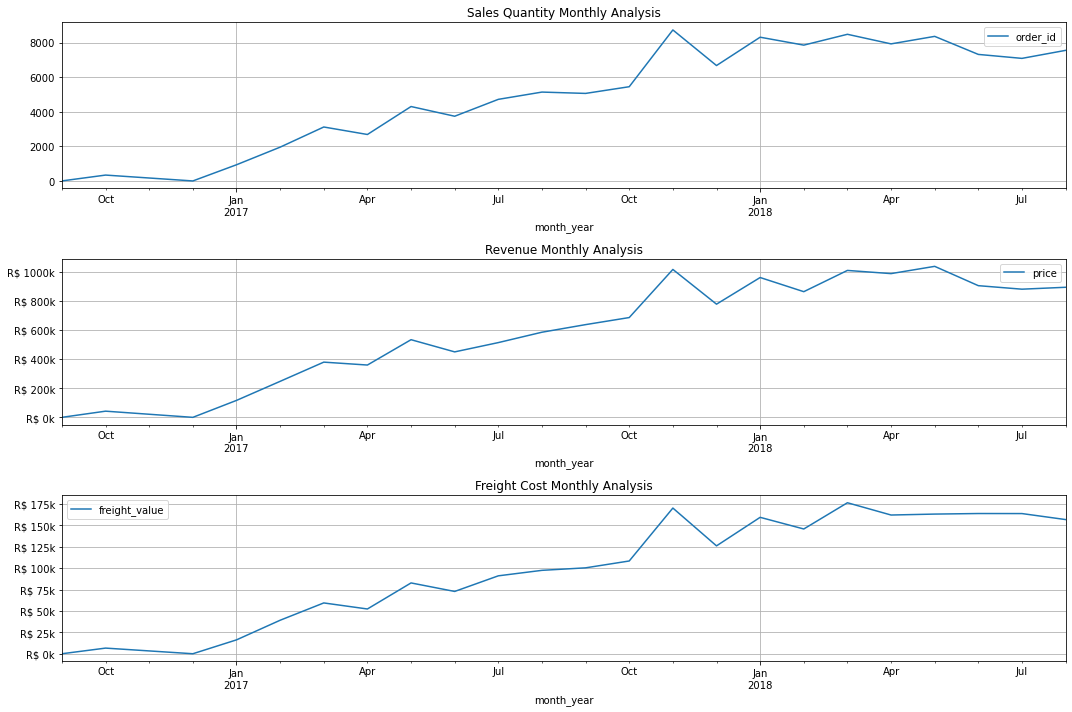

In [72]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
analisis_bulan.plot(x='month_year', y='order_id', ax=axes[0], title='Sales Quantity Monthly Analysis', grid=True)
analisis_bulan.plot(x='month_year', y='price', ax=axes[1], title='Revenue Monthly Analysis', grid=True)
analisis_bulan.plot(x='month_year', y='freight_value', ax=axes[2], title='Freight Cost Monthly Analysis', grid=True)

axes[1].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')
axes[2].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')

plt.tight_layout()
plt.show()

##### Terlihat bahwa penjualan perusahaan meningkat dari bulan ke bulan

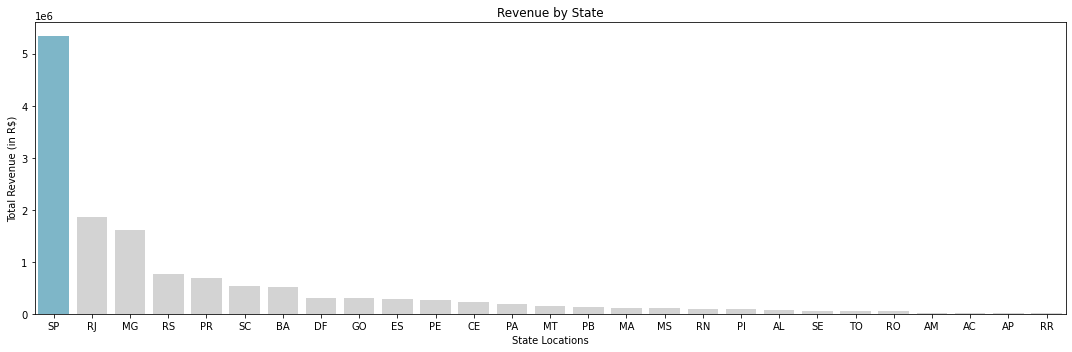

In [73]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(15, 5))
sns.barplot(x=revenue_by_state.index, y=revenue_by_state.values, palette=colors)
plt.title('Revenue by State')

plt.xlabel('State Locations')
plt.ylabel('Total Revenue (in R$)')
plt.tight_layout()
plt.show()

##### State SP menyumbang pendapatan terbanyak

Total Revenue: R$14,273,699.65
Total Freight Cost: R$2,370,031.65


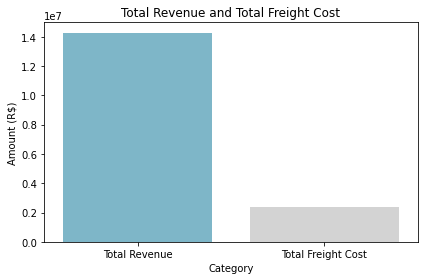

In [74]:
total_revenue = data_gabung['price'].sum()

total_freight_cost = data_gabung['freight_value'].sum()


print(f"Total Revenue: R${total_revenue:,.2f}")
print(f"Total Freight Cost: R${total_freight_cost:,.2f}")


data = {
    'Category': ['Total Revenue', 'Total Freight Cost'],
    'Amount (R$)': [total_revenue, total_freight_cost]
}

df = pd.DataFrame(data)

# Create a bar plot using Seaborn
sns.barplot(data=df, x='Category', y='Amount (R$)', palette=colors)
plt.title('Total Revenue and Total Freight Cost')
plt.ylabel('Amount (R$)')

plt.tight_layout()
plt.show()


#####  Ini bagus karena total revenue lebih tinggi dari total freight cost

### Pertanyaan 2: Pembayaran apa saja yang sering digunakan oleh pelanggan ?

Text(0.5, 0, '')

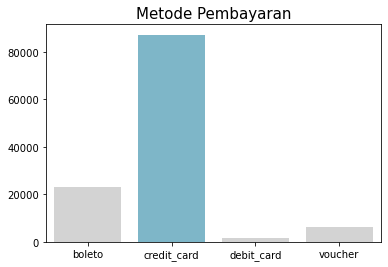

In [75]:
colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(x=payment.index, y=payment.values, palette=colors)
plt.title("Metode Pembayaran", loc="center", fontsize=15)
plt.xlabel(None)

##### Metode pembayaran yang paling banyak digunakan adalah menggunakan kartu kredit

### Pertanyaan 3 : Bagaimana Tingkat Kepuasan Pelanggan? Produk apa yang memiliki rating rendah?

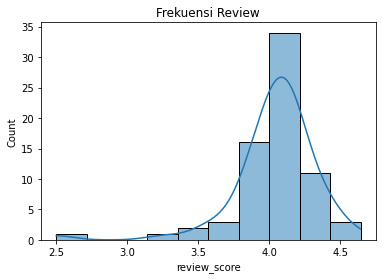

In [76]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.histplot(data=score_reviews_order, x="review_score", bins=10, kde=True)
plt.title("Frekuensi Review")
plt.show()

##### Pelanggan rata-rata puas dengan produk dengan rating 4-5

                               review_score review_classification
product_category_name_english                                    
security_and_services                   2.5                 Buruk


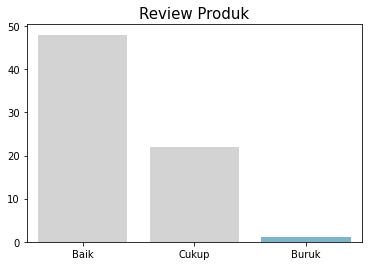

In [77]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(x=classification_counts.index, y=classification_counts.values, palette=colors)
plt.title("Review Produk", loc="center", fontsize=15)

buruk_reviews = score_reviews_order[score_reviews_order["review_classification"] == "Buruk"]
print(buruk_reviews)

##### terdapat produk yang perlu diperhatikan yaitu produk yang memiliki rating buruk

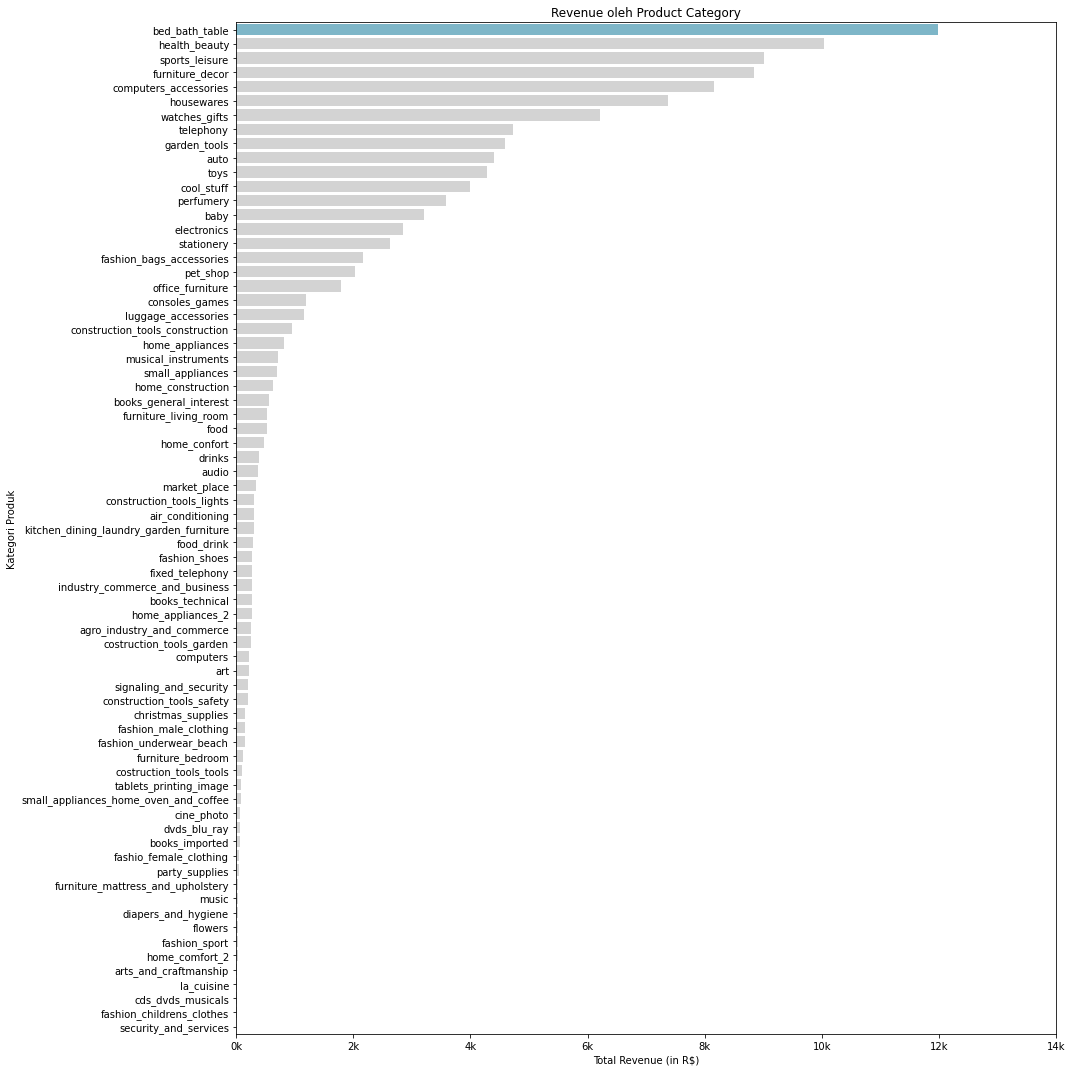

In [78]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(15, 15))
sns.barplot(y=penjualan_produk.index, x=penjualan_produk.values, palette=colors)
plt.title('Revenue oleh Product Category')
plt.xlabel('Total Revenue (in R$)')
plt.ylabel('Kategori Produk')

ticks = plt.xticks()[0]
labels = [f"{int(tick/1000)}k" for tick in ticks]
plt.xticks(ticks, labels)
plt.tight_layout()
plt.show()

##### Ternyata produk yang paling banyak terjual adalah kategori bed_bath_table, dan yang paling rendah adalah security_and_service

### Pertanyaan 4: Bagaimana Hubungan Pengiriman dengan Tingkat Kepuasan Pelanggan?

<AxesSubplot:xlabel='customer_state', ylabel='delivery_duration'>

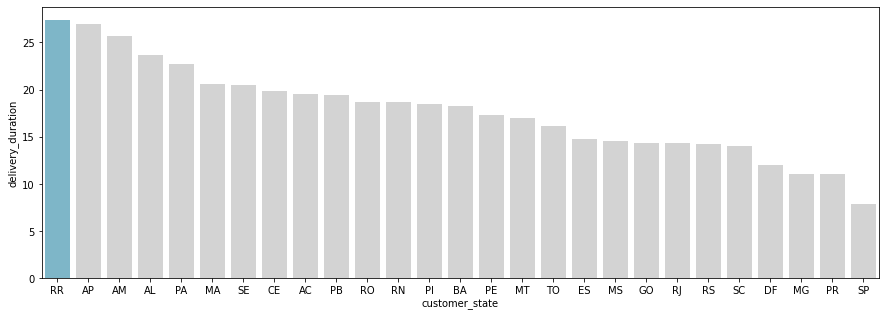

In [79]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
order_state = data_gabung.groupby(by=["customer_state"]).agg({
    "delivery_duration": "mean",
    "review_score" : "mean"
})

order_state_sorted = order_state.sort_values(by='delivery_duration', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=order_state_sorted, x=order_state_sorted.index, y='delivery_duration', palette=colors)

##### Pengiriman paling cepat sampai yaitu ke RR

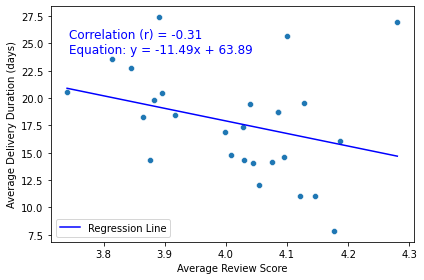

In [80]:
sns.scatterplot(data=order_state, x='review_score', y='delivery_duration')
# Hubungan Regresi
slope, intercept, r_value, p_value, std_err = stats.linregress(order_state['review_score'], order_state['delivery_duration'])
sns.lineplot(x=order_state['review_score'], y=slope * order_state['review_score'] + intercept, color='blue', label='Regression Line')


corr_eqn = f'Correlation (r) = {r_value:.2f}\nEquation: y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(corr_eqn, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12, color='blue')

plt.xlabel('Average Review Score')
plt.ylabel('Average Delivery Duration (days)')
plt.tight_layout()
plt.show()

##### Pengiriman mempengaruhi kepuasan pelanggan bahwa semakin cepat pengiriman maka pelanggan semakin puas 

### Pertanyaan 5 : Kapan strategi yang tepat untuk memasang iklan guna meningkatkan produk?

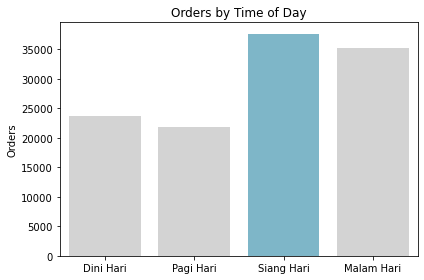

In [81]:
colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3",]
sns.barplot(data=period_data, x='period', y='order_id', palette=colors)
plt.title('Orders by Time of Day')
plt.xlabel(None)
plt.ylabel('Orders')

plt.tight_layout()
plt.show()

##### Pelanggan cenderung melakukan order pada siang hari dan diikuti malam hari 

### Pertanyaan 6 : Analisis RFM dan Churn Rate

The Churn Rate is: 97.00%


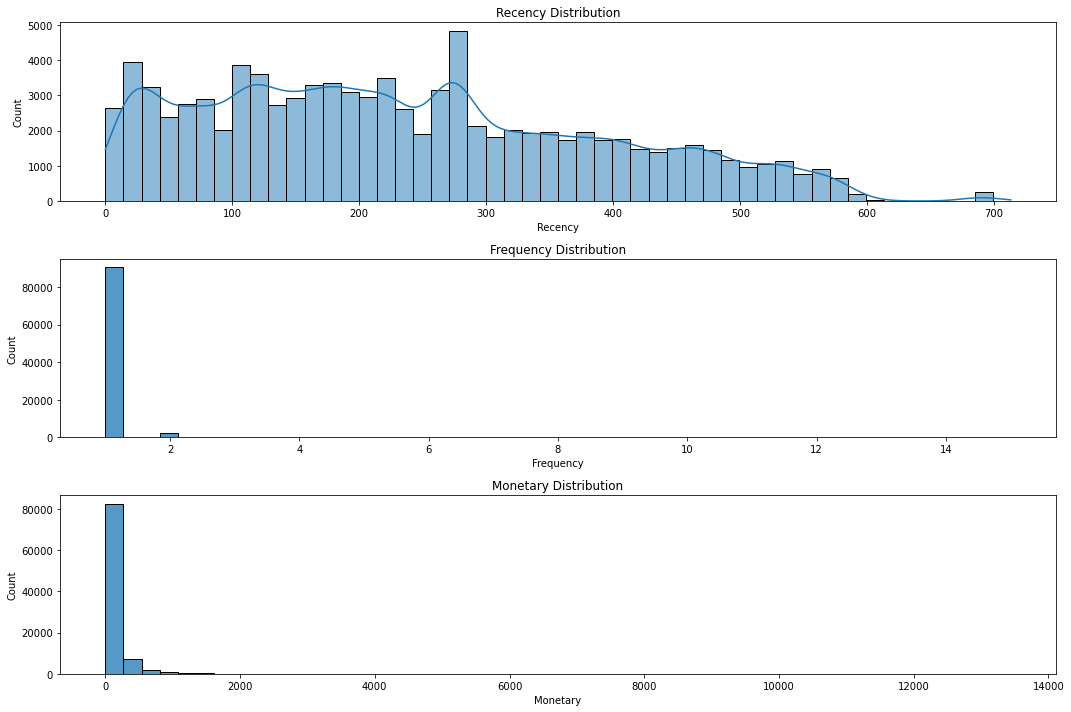

In [82]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the distributions
sns.histplot(rfm_df['Recency'], bins=50, ax=axes[0], kde=True).set_title('Recency Distribution')
sns.histplot(rfm_df['Frequency'], bins=50, ax=axes[1]).set_title('Frequency Distribution')
print(f"The Churn Rate is: {churn_rate:.2f}%")
sns.histplot(rfm_df['Monetary'], bins=50, ax=axes[2]).set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

##### Analisis RFM menunjukkan bahwa recency pelanggan terbanyak pada hari 280-300, frekuensi pelanggan sebanyak 1, dan monetary pelanggan 0-250

## Conclusion

### Pertanyaan 1: Bagaimana Peforma Penjualan Perusahaan ?
#### Berdasarkan analisis data yang diperoleh, penjualan meningkat seiring bertambahnya waktu, state SP sangat suka dengan produk perusahaan, dan pendapatan lebih tinggi dari freight cost yang dikeluarkan. Saya sebagai Junior Data Science merekomendasikan untuk:
#### 1. Jika kita ingin membuka cabang maka kita perlu, Membuat Riset clusterisasi ke state yang mirip karakteristiknya dengan state SP. Harapannya dengan karakteristik state yang mirip maka kebutuhan penduduknya juga mirip sehingga jika disana tidak ada perusahaan kompetitor maka kita akan menjadi top of mind penyedia kebutuhan produk di state tersebut.

#### 2. Memperbaiki produk yang buruk yang sudah dipasarkan di state target perusahaan kita. Untuk itu kita perlu melakukan pengolahan ke kategori apa produk yang buruk itu dengan melihat rating score kepuasan pelanggan, dan bagaimana pelanggan menyukai produk kita. (Jawabannya ada di penjelasan selanjutnya)

### Pertanyaan 2: Pembayaran apa saja yang sering digunakan oleh pelanggan ?
#### Pelanggan Lebih menyukai melakukan pembayaran menggunakan kartu kredit. dengan meningkatnya penjualan dari bulan ke bulan, kita harus melihat apakah mesin pembayaran kartu kredit ini sudah terbatas atau tidak. Kita perlu mengecek maintanance alat atau menambah alat pembayaran kartu kredit guna persiapan lonjakan pembelian yang tajam. Rekomendasi saya terhadap hal ini adalah pengadaan/peningkatan sistem pembayaran kartu kredit untuk persiapan terhadap segala kondisi. Jangan sampai pelanggan batal membeli karena masalah di pembayaran

### Pertanyaan 3 : Bagaimana Tingkat Kepuasan Pelanggan? Produk apa yang memiliki rating rendah?
#### Setelah melakukan analisis terhadap kepuasan pelanggan rata-rata pelanggan kita tergolong puasa dengan rating 4-5. Disamping itu, ternyata produk yang paling banyak terjual adalah kategori bed_bath_table, dan yang paling rendah adalah security_and_service. Saya merekomendasikan

#### Membuat perbaikan produk terhadap kategori security_and_service karena rating yang buruk (dibawah 3). Jika ingin meningkatkan penjualan kita perlu memperbaiki produk ini. Atau jika perusahaan dirasa tidak mampu memperbaikinya maka kita bisa hilangkan saja karena produk ini juga terjual hanya sedikit. Hal ini tentu dilema, Namun jika tujuan awal kita adalah memenuhi kepuasan pelanggan maka kita harus memperbaiki produk tersebut hingga produk tersebut sehingga membuat rating kita naik.

### Pertanyaan 4: Bagaimana Hubungan Pengiriman dengan Tingkat Kepuasan Pelanggan?
#### Hasil Analisis Menunjukkan Pengiriman paling cepat sampai yaitu ke state RR, Bagaimana Pengiriman ini bisa cepat sampai? Kita perlu mengadopsi pengiriman state RR ke state lainnya. Hal ini karena cepatnya pengiriman mempengaruhi kepuasan pelanggan dengan korelasi -0.3 yang artinya semakin cepat pengiriman produk maka semakin puas pelanggan. Kita perlu membuat divisi khusus yang menangani pengiriman jika ingin membuat puas pelanggan, bahkan bisa mengalahkan kompetitor-kompetitor lainnya dengan perbedaan ini.

### Pertanyaan 5 : Kapan strategi yang tepat untuk memasang iklan guna meningkatkan produk?
#### Berbicara dari segi hal digital marketing, Kita menemukan waktu yang tepat untuk mengiklankan produk kita. Kita dapat mengurangi iklan yang muncul di waktu dini hari dan pagi hari dan mengalokasikannya ke waktu siang dan malam hari. Hal ini karena riset yang saya temukan dengan pola pelanggan yang cenderung untuk melakukan order pada siang dan malam hari. maka dari itu lebih efektif untuk menempatkan iklan di waktu tersebut guna menyasar pelanggan yang lebih banyak.

### Pertanyaan 6 : Analisis RFM dan Churn Rate
#### Analisis RFM menunjukkan bahwa recency pelanggan terbanyak pada 280-300 hari, frekuensi pelanggan dominan 1, dan monetary pelanggan 0-250. Saya merekomendasikan 

#### 1. Soal Recency kita perlu melakukan riset kenapa banyak pelanggan yang tidak membeli lagi di hari tersebut, apakah karena kompetitor lebih menarik, teknologi kurang, terrdapat produk substitusi, atau terdapat bencana alam. Hal hal tersebut perlu kita perbaiki guna mengembalikan pelanggan kita kembali. 

#### 2. Sedangkan rekomendasi untuk Frekuensi, Kita perlu untuk membuat member card atau kita boleh meminta izin untuk promosi produk ke pelanggan guna menarik mereka untuk berbelanja lagi ke kita. Member card dapat berisi diskon, promo beli 2 dapat 1, dan promo menarik lainnya. Dengan begitu, pelanggan yang sudah membeli produk ke kita akan tertarik lagi dengan promo-promo yang sudah kita siapkan.

#### 3. Pelanggan cenderung menghabiskan uangnya pada Rdollar 0-250. kita perlu melakukan clusterisasi terhadap produk-produk yang mendukung produk lain untuk kita letakkan di rekomendasi produk yang sering dibeli oleh pelanggan. Contoh produk yang sering dibeli pelanggan adalah sikat gigi maka kita perlu meletakkan pasta gigi direkomendasi produk tersebut guna meningkatkan monetary perusahaan.